In [ ]:
import xarray as xr

file_path = '/Users/jessecox/Desktop/Capstone/HAB-F-Capstone/Data/AQUA_MODIS.20240602T182001.L2.OC.nc'

# Open only the "geophysical_data" group
ds = xr.open_dataset(file_path, group="geophysical_data")

# List all variables in that group
print("Variables in geophysical_data:")
for var in ds.data_vars:
    print(f"  • {var}")


In [ ]:
import os
os.getcwd()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Data/PMN_20250605.csv', encoding = 'ISO-8859-1')
#df = df[df['abundance'] == 'Elevated']
df['spec_name'].value_counts().head(30)

spec_name
Coscinodiscus morphotype       35281
Skeletonema spp.               29847
Rhizosolenia morphotype        28477
Pleurosigma morphotype         27378
Thalassionema spp.             23033
Chaetoceros spp.               21039
Navicula morphotype            20315
Nitzschia morphotype           19833
Pseudo-nitzschia spp.          19240
Odontella spp.                 17872
Asterionellopsis morphotype    16365
Chaetoceros socialis           14951
Ditylum spp.                   14685
Protoperidinium spp.           14245
Guinardia spp.                 13487
Stephanopyxis spp.             10165
Bacillaria spp.                 8384
Entomoneis spp.                 7926
Leptocylindrus spp.             7605
Thalassiosira spp.              7077
Fragilariopsis spp.             6845
Ceratium furca morphotype       6519
Akashiwo sanguinea              6486
Eucampia spp.                   6109
Dinophysis spp.                 5239
Dactyliosolen spp.              4989
Ceratium fusus morphotype   

In [ ]:
df = df[df['sample_site'] == 'NY - Montauk']
df['longitude'].unique()

In [ ]:
df

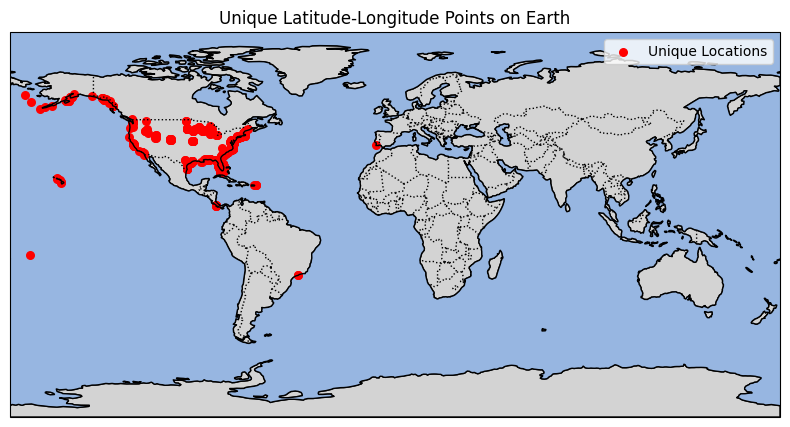

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#df = df[df['longitude'] > 0]
#df['longitude'] = -df['longitude']

# Drop duplicate lat/lon pairs
unique_points = df[['latitude', 'longitude']].drop_duplicates()

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Add features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN)

# Plot points
ax.scatter(
    unique_points['longitude'], 
    unique_points['latitude'], 
    color='red', 
    s=30, 
    transform=ccrs.PlateCarree(), 
    label='Unique Locations'
)

# Title and legend
plt.title("Unique Latitude-Longitude Points on Earth")
plt.legend()
plt.show()


In [ ]:
df.sample_site.unique()

In [ ]:
df = df[df['sample_site'] != 'MD - Gaynor Dock']
df = df[df['sample_site'] != 'NY - Mattituck Inlet']
df = df[df['sample_site'] != 'FL - Fwri']
df = df[df['sample_site'] != 'SC - Cherry Point Boat Landing, Wadmalaw Island, SC']

In [6]:
df[df['datetime'] == sorted(df['datetime'].unique())[-1]]

,latitude,longitude,datetime,sample_site,spec_name,abundance,water_temp,air_temp,salinity,comments,...,QA_water_temp,QA_air_temp,QA_salinity,QA_windspeed,QA_count,QA_ph,QA_dissoxygen,QA_sample_site,QA_latitude,QA_longitude
483544,29.253328,-90.662585,2025-05-22 15:45:00+00:00,LA - LUMCON,Coscinodiscus spp.,Present,28.0,26.0,8.0,NaN,...,1,1,1,1,9,9,1,1,1,1
483545,29.253328,-90.662585,2025-05-22 15:45:00+00:00,LA - LUMCON,Heterosigma akashiwo,Present,28.0,26.0,8.0,NaN,...,1,1,1,1,9,9,1,1,1,1
483546,29.253328,-90.662585,2025-05-22 15:45:00+00:00,LA - LUMCON,Actinoptychus spp.,Present,28.0,26.0,8.0,NaN,...,1,1,1,1,9,9,1,1,1,1
483547,29.253328,-90.662585,2025-05-22 15:45:00+00:00,LA - LUMCON,Leptocylindrus spp.,Present,28.0,26.0,8.0,NaN,...,1,1,1,1,9,9,1,1,1,1
483548,29.253328,-90.662585,2025-05-22 15:45:00+00:00,LA - LUMCON,Odontella spp.,Present,28.0,26.0,8.0,NaN,...,1,1,1,1,9,9,1,1,1,1
483549,29.253328,-90.662585,2025-05-22 15:45:00+00:00,LA - LUMCON,Skeletonema spp.,Present,28.0,26.0,8.0,NaN,...,1,1,1,1,9,9,1,1,1,1
